[-0.05  0.05  0.15  0.25  0.35  0.45  0.55  0.65  0.75  0.85  0.95  1.05]
[ 2495.   386.   300.   391.   595.  1001.  1866.  4364.  7879. 17623.
 63100.]
[0.02495 0.02881 0.03181 0.03572 0.04167 0.05168 0.07034 0.11398 0.19277
 0.369   1.     ]


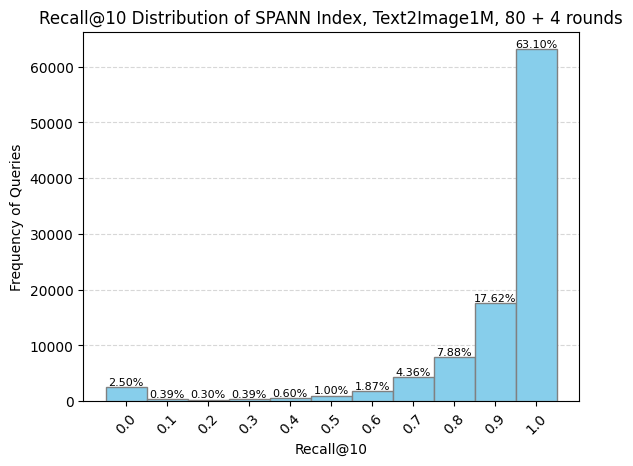

80 + 4 rounds Average Recall@10: 0.903927, qps: 117.375000
[-0.05  0.05  0.15  0.25  0.35  0.45  0.55  0.65  0.75  0.85  0.95  1.05]
[ 2623.   403.   358.   467.   716.  1256.  2272.  5021.  8930. 18759.
 59195.]
[0.02623 0.03026 0.03384 0.03851 0.04567 0.05823 0.08095 0.13116 0.22046
 0.40805 1.     ]


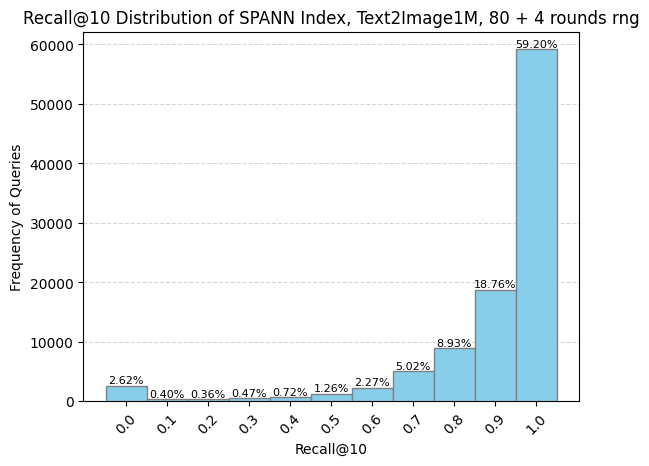

80 + 4 rounds rng Average Recall@10: 0.892664, qps: 145.169700
[-0.05  0.05  0.15  0.25  0.35  0.45  0.55  0.65  0.75  0.85  0.95  1.05]
[ 2782.   412.   322.   404.   604.  1031.  1780.  4053.  7309. 16390.
 64913.]
[0.02782 0.03194 0.03516 0.0392  0.04524 0.05555 0.07335 0.11388 0.18697
 0.35087 1.     ]


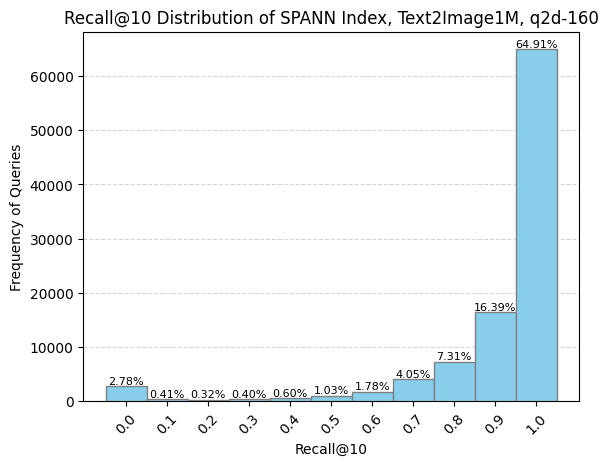

q2d-160 Average Recall@10: 0.904002, qps: 138.753100
[1.      0.97505 0.97119 0.96819 0.96428 0.95833 0.94832 0.92966 0.88602
 0.80723 0.631  ]
[1.      0.97377 0.96974 0.96616 0.96149 0.95433 0.94177 0.91905 0.86884
 0.77954 0.59195]
[1.      0.97218 0.96806 0.96484 0.9608  0.95476 0.94445 0.92665 0.88612
 0.81303 0.64913]
80 + 4 rounds average recall: 0.903927, qps: 117.375000
80 + 4 rounds rng average recall: 0.892664, qps: 145.169700
q2d-160 average recall: 0.904002, qps: 138.753100


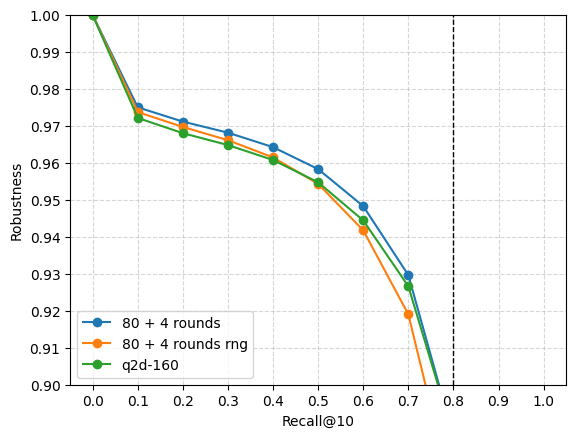

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import matplotlib.pyplot as plt
import numpy as np

# Function to extract recall values from log file
def extract_recall(log_file):
    recall_values = []
    qps = 0
    with open(log_file, 'r') as file:
        for line in file:
            match = re.search(r'recall:(\d+\.\d+)', line)
            if match:
                recall_values.append(round(float(match.group(1)), 1))
            # average latency is on the 2-nd last line
            if line.startswith("[1] 0-100000"):
                qps = float(line.split()[-1])    
    return recall_values, qps

# Function to plot recall distribution
def plot_recall_distribution(recall_values, case):
    # num_bins = 11
    bins = np.arange(-0.05, 1.15, 0.1)
    
    counts, bins, patches = plt.hist(recall_values, bins=bins, edgecolor='grey', color='skyblue', zorder=10)
    
    print(bins)
    print(counts)
    total_count = sum(counts)
    percentages = (counts / total_count) * 100
    # calcualte cdf of counts
    cdf = np.cumsum(counts)
    cdf = cdf / cdf[-1]
    # print cdf one by one
    # print("cdf")
    print(cdf)
    cdf = 1 - cdf
    plt.title('Recall@10 Distribution of SPANN Index, Text2Image1M, %s'%case)
    plt.xlabel('Recall@10')
    plt.ylabel('Frequency of Queries')
    

     # Set tick positions
    tick_positions = bins[:-1] + (bins[1] - bins[0]) / 2
    
    plt.xticks(tick_positions, [f'{x:.1f}' for x in tick_positions], rotation=45)
    for percent, count, x in zip(percentages, counts, tick_positions):
        plt.text(x, count, f'{percent:.2f}%', ha='center', va='bottom', fontsize=8)
        # plt.text(x, count, str(int(count)), ha='center', va='bottom')

    plt.grid(axis='y', alpha=0.5, linestyle='--', zorder=0)
    plt.show()
    return cdf

# Function to round the values to the nearest 0.1
def round_to_nearest_tenth(values):
    return np.round(values * 10) / 10





# read files from result logs and extract the parameters from file name after "each_"

# rbs = float("%.4f"%(1 - cdf_spann[7]))
# print(rbs)
# tags.append("SPANN")
cdfs = []
tags = []

# cases = ['doc2doc-64', 'doc2doc-128', 'query2doc-64', 'query2doc-128']
# cases = ['64', '32', '16', '8']
# cases = ['auto-64', '4-64', '4-64', '16-64', '32-64', 'q2d-64']
cases = ['80 + 4 rounds', '80 + 4 rounds rng', 'q2d-160']
# logs = ['Release/searchlog-text2image1M-d2d-8-64', 'Release/searchlog-text2image1M-d2d-128', 'Release/searchlog-text2image1M-q2d-64', 'Release/searchlog-text2image1M-q2d-128']
# logs = ['Release/searchlog-text2image10M-d2d-64', 'Release/searchlog-text2image10M-d2d-128', 'Release/searchlog-text2image10M-q2d-64', 'Release/searchlog-text2image10M-q2d-128']
# logs = ['Release/searchlog-text2image10M-q2d-64', 'Release/searchlog-text2image10M32', 'Release/searchlog-text2image10M16', 'Release/searchlog-text2image10M8']
# logs = ["Release/searchlog-text2image1M-d2d-auto-64", 'Release/searchlog-text2image1M-d2d-4-64', 'Release/searchlog-text2image1M-d2d-4-64', 'Release/searchlog-text2image1M-d2d-16-64', 'Release/searchlog-text2image1M-d2d-32-64', 'Release/searchlog-text2image1M-q2d-64']
logs = ['Release/searchlog-text2image10M-d2d-internal80', 'Release/searchlog-text2image10M-d2d-internal80-rng', 'Release/searchlog-text2image10M-q2d-160']
avg_recalls = []
qpss = []
for i in range(len(cases)):
    log_file = logs[i]
    recall_values, qps = extract_recall(log_file)
    cdf = plot_recall_distribution(recall_values, cases[i])
    avg_recall = np.mean(recall_values)
    print("%s Average Recall@10: %f, qps: %f"%(cases[i], avg_recall, qps))
    avg_recalls.append(avg_recall)
    qpss.append(qps)

    cdfs.append(np.insert(cdf, 0, 1)[:-1])
    tags.append(cases[i])


for i in range(len(cdfs)):
    # plot a line for the cdf
    print(cdfs[i])
    plt.plot(np.arange(0.0, 1.1, 0.1), cdfs[i], linestyle='-', marker='o')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend(tags)

# plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.ylim(0.9, 1)
plt.yticks(np.arange(0.9, 1.01, 0.01))

# add a grid line at x=0.8
plt.axvline(x=0.8, color='black', linestyle='--', linewidth=1)
# plt.axhline(x=0.8, color='black', linestyle='--', linewidth=1)
plt.grid(axis='y', alpha=0.5, linestyle='--', zorder=0)
plt.grid(axis='x', alpha=0.5, linestyle='--', zorder=0)
# plt.title('Cumulative Recall@10 Distribution of FAISS HNSW Index, SIFT1M')
plt.ylabel('Robustness')
plt.xlabel('Recall@10')
for i in range(len(cases)):
    print("%s average recall: %f, qps: %f"%(cases[i], avg_recalls[i], qpss[i]))
plt.show()

